# Export job vacancies from database to CSV and load into DataFrame


In [12]:
import os
import sqlite3
import csv
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

connection = sqlite3.connect(f"../{os.getenv("DB_NAME")}")
cursor = connection.cursor()

with open("job_vacancies.csv", "w+", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    column_names = ["Job Title", "Posting Date", "Experience", "Company", "Job Description", "Location", "Salary", "Required Technologies"]
    writer.writerow(column_names)

    cursor.execute(f"SELECT * FROM {os.getenv("TABLE_NAME")}")
    writer.writerows(cursor.fetchall())

connection.close()
job_vacancies_df = pd.read_csv("job_vacancies.csv")

# Top 10 companies with the largest number of vacancies

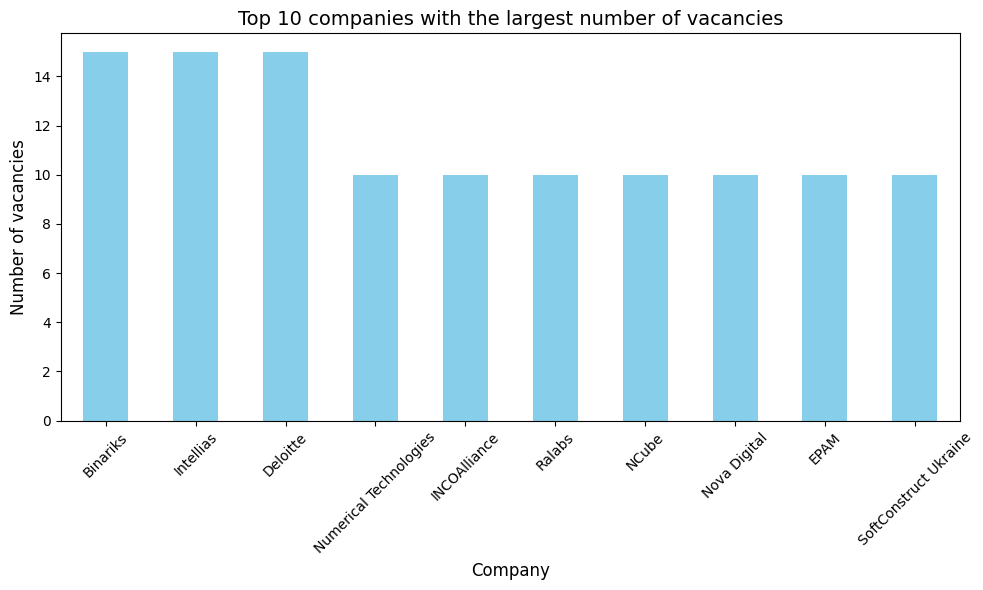

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("job_vacancies.csv")
company_counts = df["Company"].value_counts()
top_10_companies = company_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_companies.plot(kind="bar", color="skyblue")
plt.title("Top 10 companies with the largest number of vacancies", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Number of vacancies", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of vacancies by technology

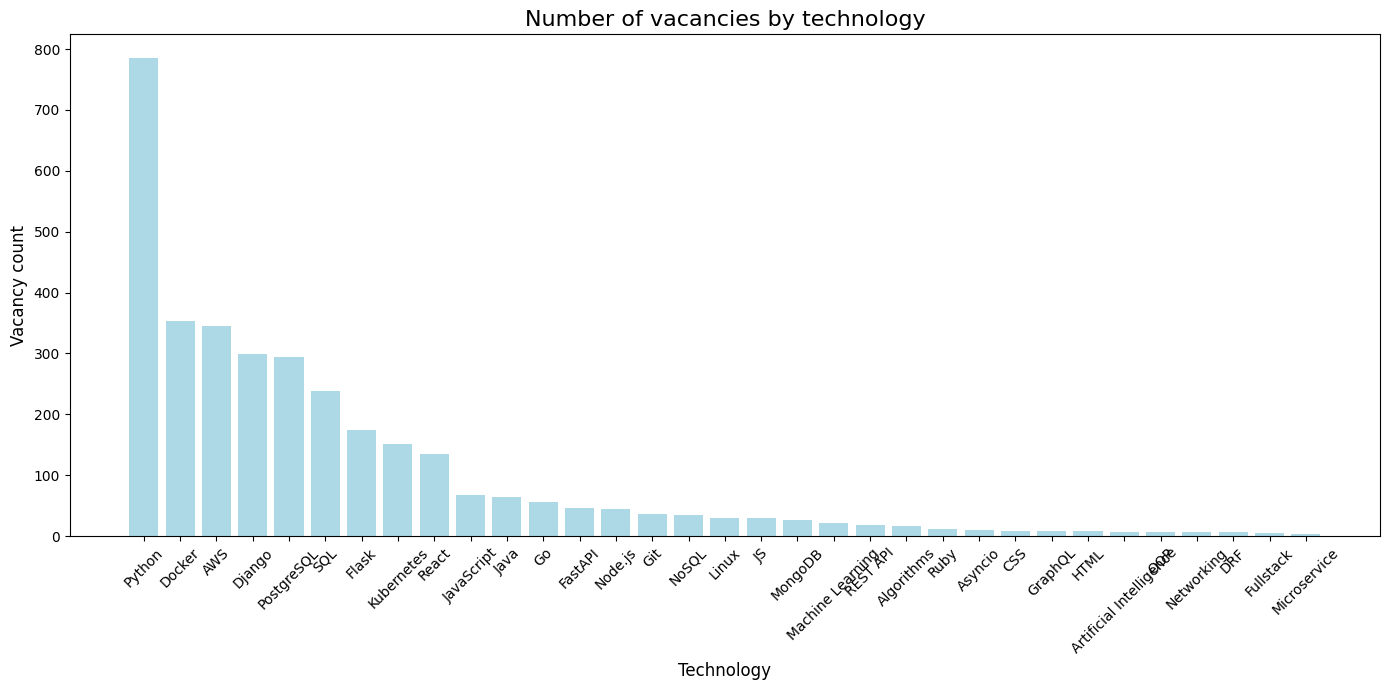

In [23]:
all_technologies = [tech for techno in df["Required Technologies"] if pd.notna(techno) for tech in techno.split(", ")]
unique_technologies = list(set(all_technologies))

for tech in unique_technologies:
    df[tech] = df["Required Technologies"].apply(lambda x: 1 if pd.notna(x) and tech in x.split(", ") else 0)

technology_counts = df[unique_technologies].sum().sort_values(ascending=False)


technology_counts_df = technology_counts.reset_index()
technology_counts_df.columns = ["Technology", "Vacancy Count"]

plt.figure(figsize=(14, 7))
plt.bar(technology_counts_df["Technology"], technology_counts_df["Vacancy Count"], color="lightblue")
plt.title("Number of vacancies by technology", fontsize=16)
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Vacancy count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of vacancies for experience years

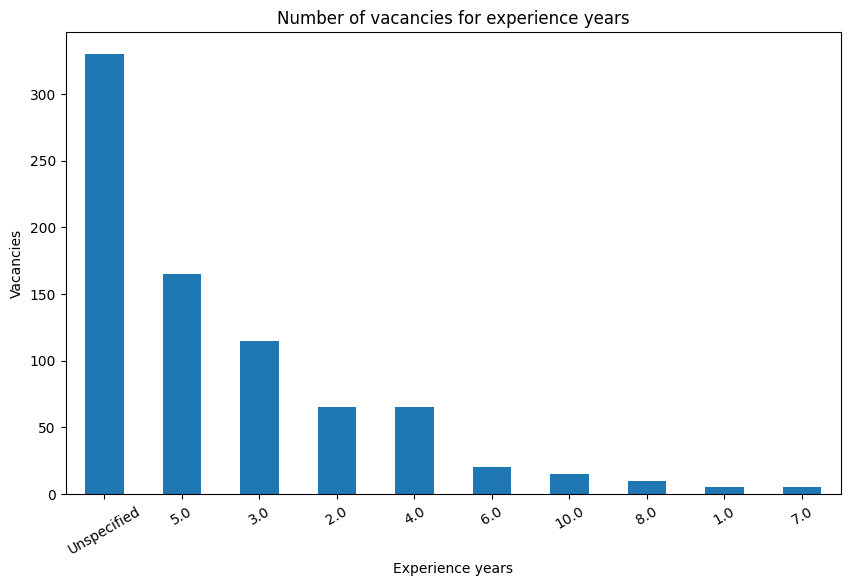

In [22]:
df["Experience"] = df["Experience"].fillna("Unspecified")
experience_count = df.groupby("Experience")["Experience"].count()

experience_count.sort_values(ascending=False).plot.bar(
    title="Number of vacancies for experience years",
    xlabel="Experience years",
    ylabel="Vacancies",
    rot=30,
    figsize=(10, 6)
)
plt.show()